# 1. Entendiendo la sintaxis de ggplot
El primer detalle importante a la hora de trabajar con ggplot, será que trabaja con **dataframes** en vez de **vectores**. Lo segundo es que podremos mejorar o agregar más características a nuestro gráfico  aplicando más y más capas a lo que ya tenemos.

Así, primero haremos un ggplot básico usando el *dataset midwest*, datos demográficos de los condados del Medio Oeste en Estados Unidos.

In [6]:
# Paquetes a instalar previamente: plotnine, matplotlib, pandas, scikit-misc

In [63]:
# cargando modulo necesario
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd   
midwest = pd.read_csv("http://goo.gl/G1K41K") # descargando el dataset

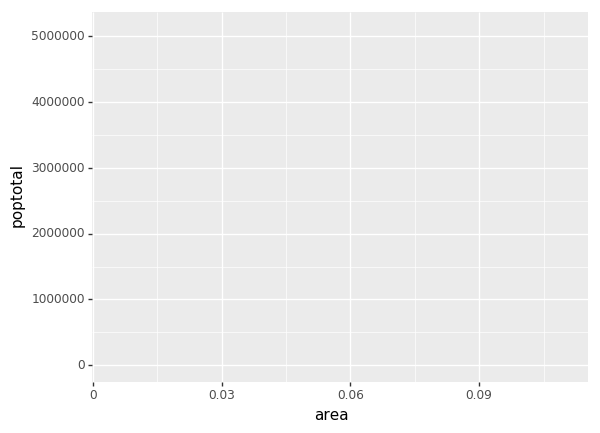

<ggplot: (-9223371899215405354)>

In [9]:
# Inicializacion de ggplot
ggplot(midwest, aes(x='area', y='poptotal'))

Hemos creado un ggplot vacío. A pesar de que los ejes están especificados, no hay ningún punto o línea en él. 
Esto es debido a que ggplot no asume que deseabas dibujar un scatterplot o un gráfico de líneas. Solo le hemos dado el conjunto de datos para trabajar y asignamos las columnas para el eje X y el eje Y.
Además, la función *aes()* ha sido ocupada para especificar los ejes X e Y. Esto es debido a que toda la información pertinente al dataset utilizado debe estar dentro de la función *aes()*


# 2. Creando nuestro primer Scatterplot
Agreguemos un scatterplot encima del ggpplot vacío anterior, utilizando la función *geom_point*

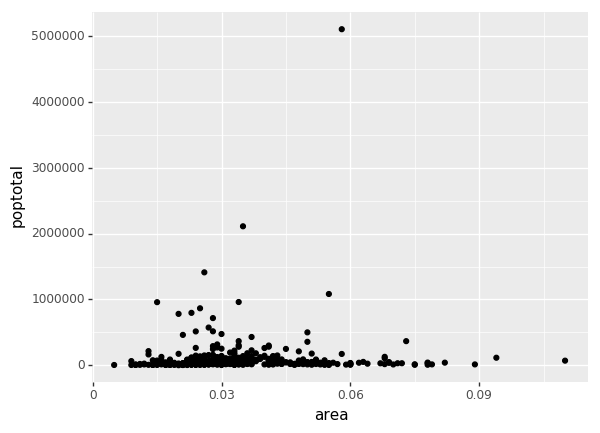

<ggplot: (137639376781)>

In [10]:
g = ggplot(midwest, aes(x='area', y='poptotal')) + geom_point()
g

Hemos creado un scatterplot básico, donde cada punto está representando a un condado. 
Nos faltan algunas importantes para tener nuestro gráfico completo, como el título, etiquetas para los ejes, etc. Además, la mayoría de los puntos están concentrados en la parte inferior del gráfico y esto no se ve bien. Esto lo arreglaremos con los pasos siguientes.

*** 
Así como *geom_point()*, existen muchas capas *geom* que veremos durante este tutorial. Por ahora, ups.

## 2.1 Agregando una regresión lineal.
Con el comando *geom_smooth()* podemos agregar fácilmente una regresión lineal para ajustar nuestros datos a una recta.


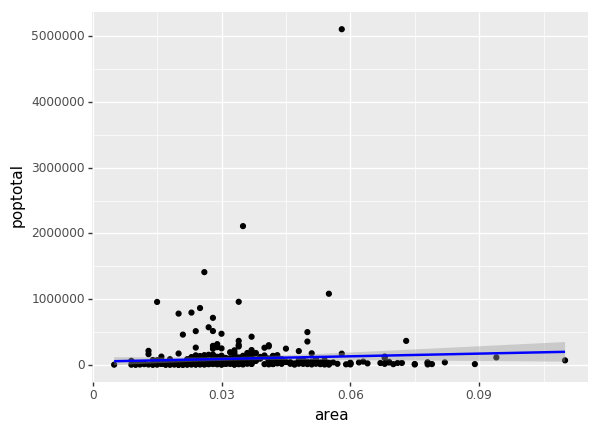

<ggplot: (-9223371899214337834)>

In [35]:
g = ggplot(midwest, aes(x='area', y='poptotal')) + geom_point() + geom_smooth(method="lm", color = 'blue')
g

## 3. Ajustando los ejes X e Y.

### Método 1: Eliminando los puntos fuera del rango.
Esto hará que tengamos un gráfico centrado solo en la parte que nos interesa. Lo anterior lo lograremos con las funciones *xlim()* y *ylim()*, agregando un vector de 2 componentes a cada una.

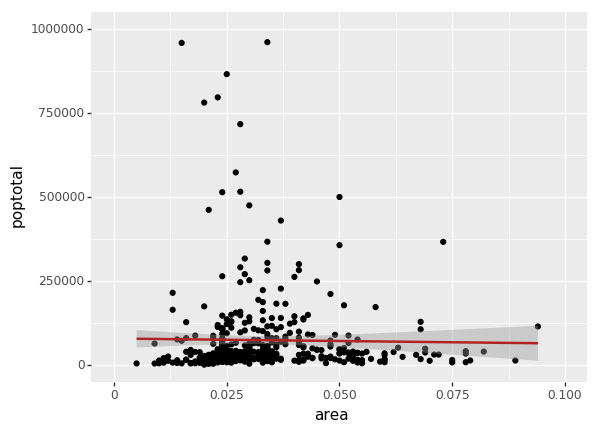

<ggplot: (137641955932)>

In [58]:
g2 = ggplot(midwest, aes(x='area', y='poptotal')) + geom_point(na_rm= True)
g2 + xlim(0,0.1) + ylim(0,1000000) + geom_smooth(method="lm", color = 'firebrick')

## 4. Cambiando el Título y las etiquetas 
Para agregar títulos y las etiquetas de los ejes X e Y, se puede usar la función *labs()* teniendo esí como título el argumento de aquella función.

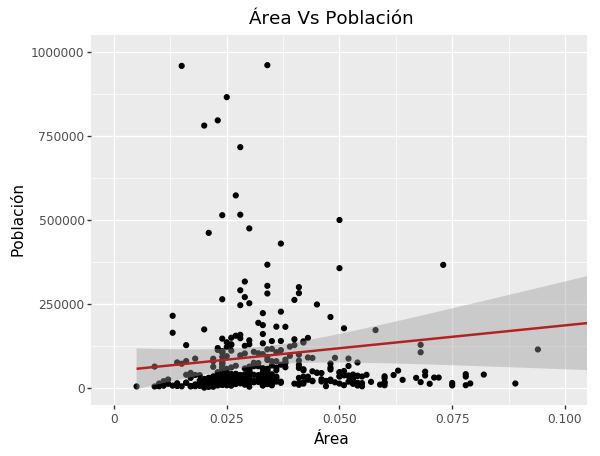

<ggplot: (137639770793)>

In [41]:
ggplot(midwest, aes(x='area', y='poptotal')) +\
            geom_point() + \
            geom_smooth(method="lm", color = 'firebrick') + \
            coord_cartesian(xlim=[0,0.1], ylim=[0, 1000000]) +\
             labs(title="Área Vs Población", y="Población", x="Área", caption="Demografía Medio Oeste")

## 5. Manipulando colores y tamaños de los puntos.
Podremos también manipular la estética de los gráficos, agregando más atributos a las funciones utilizadas.

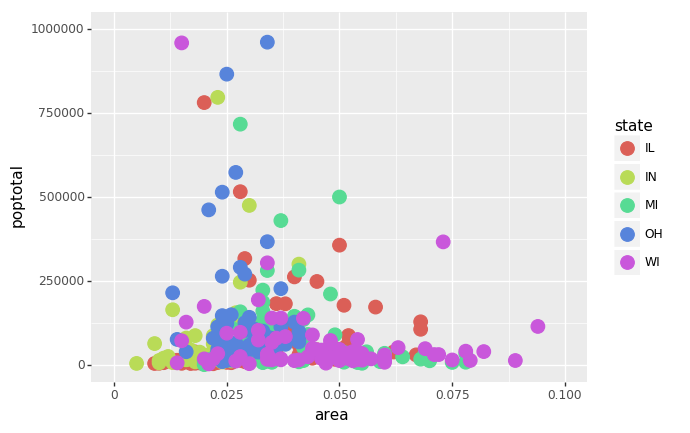

<ggplot: (137640229156)>

In [59]:
ggplot(midwest, aes(x='area', y='poptotal', color = 'state')) + xlim(0,0.1) + ylim(0,1000000)+ geom_point(na_rm= True, size=5)

Aquí, cada punto está coloreado de acuerdo al estado donde está ubicado el condado. Así como modificamos la paleta de colores utilizando el comando *color = 'state'*. Podemos también modificar forma, tamaño, relleno.

ggplot de forma inteligente ocupa tantos colores como categorías necesitamos, de forma automática de acuerdo a los datos. Además, agrega una leyenda (lado izquierdo) con ésta información.

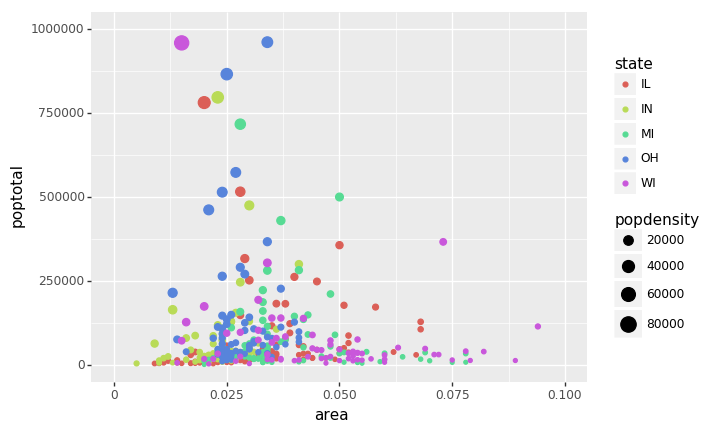

<ggplot: (-9223371899214893887)>

In [60]:
g4 = ggplot(midwest, aes(x='area', y='poptotal', color = 'state')) + xlim(0,0.1) + ylim(0,1000000)+ geom_point(aes(size = 'popdensity'), na_rm= True)
g4

Aquí agregamos la densidad poblacional de cada condado como el tamaño representando su punto en la gráfica.


Por otro lado, podemos agregar un tema a nuestro gráfico, cambiando las estética general ocupada. El tema por defecto es *theme_gray()*. Otros ejemplos son *theme_bw()* o el tema inspirado en las tiras cómicas de [xkcd](https://xkcd.com/418/).

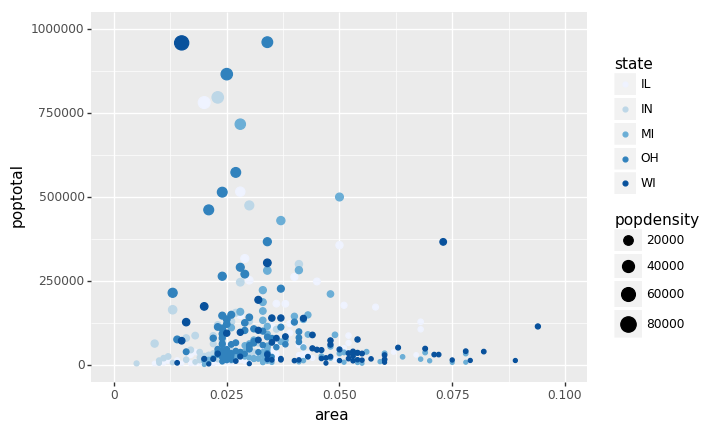

<ggplot: (137641757055)>

In [61]:
ggplot(midwest, aes(x='area', y='poptotal', color = 'state')) + xlim(0,0.1) + ylim(0,1000000)+ geom_point(aes(size='popdensity'), na_rm= True) + scale_color_brewer(palette = 'Blues')

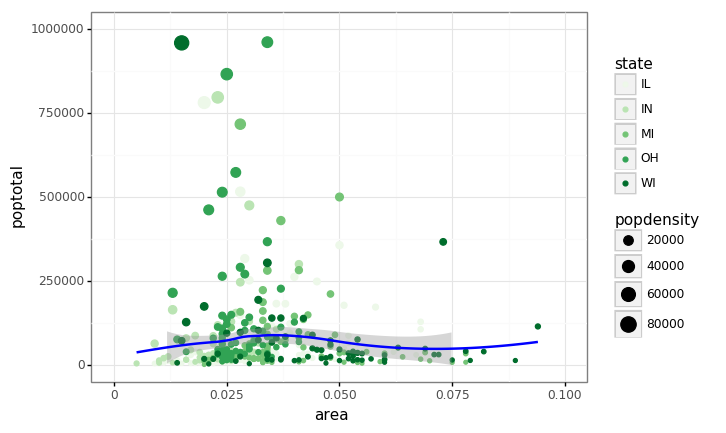

<ggplot: (-9223371899215046803)>

In [57]:
ggplot(midwest, aes(x='area', y='poptotal', color = 'state')) + xlim(0,0.1) + ylim(0,1000000)+ geom_point(aes(size='popdensity'), na_rm= True) +geom_smooth(method='loess', color = 'blue') +  scale_color_brewer(palette = 'Greens') + theme_bw()

In [ ]:
Podemos agregar otro método para ajustar nuestros datos a una curva, por ejemplo con Regresión Local.

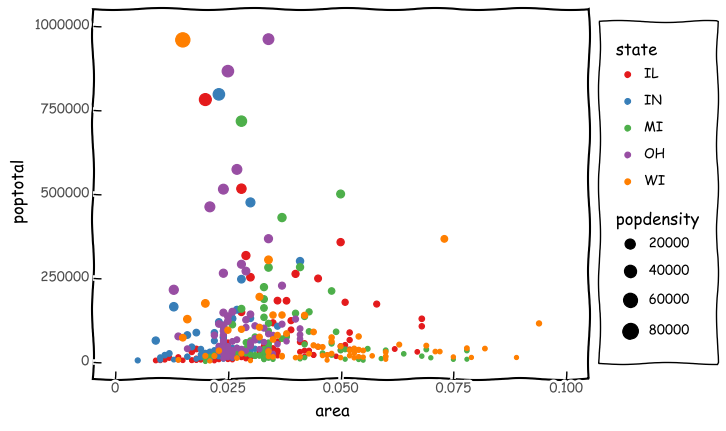

<ggplot: (-9223371899214392099)>

In [66]:
ggplot(midwest, aes(x='area', y='poptotal', color = 'state')) + xlim(0,0.1) + ylim(0,1000000)+ geom_point(aes(size='popdensity'), na_rm= True) + scale_color_brewer(type = 'qual',palette = 'Set1') + theme_xkcd()